In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [306]:
data = pd.read_csv("kawasaki.csv")

In [307]:
data.head()

,Unnamed: 0,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積,URL
0,0,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,7階,7.9万円,6500円,-,-,1K,21.6m2,https://suumo.jp/chintai/jnc_000043448104/?bc=...
1,1,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,5階,7.92万円,6800円,7.92万円,7.92万円,1K,21.6m2,https://suumo.jp/chintai/jnc_000017587804/?bc=...
2,2,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,10階,8.85万円,-,8.85万円,8.85万円,1K,21.6m2,https://suumo.jp/chintai/jnc_000077073242/?bc=...
3,3,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,11階,8.9万円,-,8.9万円,8.9万円,1K,21.6m2,https://suumo.jp/chintai/jnc_000057394010/?bc=...
4,4,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,12階,8.22万円,6800円,8.22万円,8.22万円,1K,21.6m2,https://suumo.jp/chintai/jnc_000075227219/?bc=...


In [308]:
# モデル作成にURLいらない
data = data.drop("URL", axis=1)

In [309]:
data.head()

,Unnamed: 0,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積
0,0,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,7階,7.9万円,6500円,-,-,1K,21.6m2
1,1,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,5階,7.92万円,6800円,7.92万円,7.92万円,1K,21.6m2
2,2,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,10階,8.85万円,-,8.85万円,8.85万円,1K,21.6m2
3,3,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,11階,8.9万円,-,8.9万円,8.9万円,1K,21.6m2
4,4,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,12階,8.22万円,6800円,8.22万円,8.22万円,1K,21.6m2


In [310]:
# モデル作成にUnnamed: 0いらない
data = data.drop("Unnamed: 0", axis=1)

In [311]:
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積
0,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,7階,7.9万円,6500円,-,-,1K,21.6m2
1,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,5階,7.92万円,6800円,7.92万円,7.92万円,1K,21.6m2
2,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,10階,8.85万円,-,8.85万円,8.85万円,1K,21.6m2
3,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,11階,8.9万円,-,8.9万円,8.9万円,1K,21.6m2
4,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,築13年,13階建,12階,8.22万円,6800円,8.22万円,8.22万円,1K,21.6m2


In [312]:
data.shape

(1893, 13)

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   名称      1893 non-null   object
 1   カテゴリー   1893 non-null   object
 2   アドレス    1893 non-null   object
 3   アクセス    1868 non-null   object
 4   築年数     1893 non-null   object
 5   構造      1893 non-null   object
 6   階数      1893 non-null   object
 7   家賃      1893 non-null   object
 8   管理費     1893 non-null   object
 9   敷金      1893 non-null   object
 10  礼金      1893 non-null   object
 11  間取り     1893 non-null   object
 12  面積      1893 non-null   object
dtypes: object(13)
memory usage: 192.4+ KB


## 築年数を数値データへ変換

In [314]:
data["築年数"].value_counts()

築7年     321
築8年     186
築3年     183
築6年     114
新築      102
築16年     84
築5年      81
築13年     66
築17年     63
築10年     60
築2年      48
築14年     42
築31年     42
築32年     39
築15年     36
築24年     36
築11年     33
築50年     33
築9年      33
築29年     30
築4年      27
築19年     24
築30年     21
築42年     21
築34年     21
築37年     18
築43年     18
築26年     15
築35年     15
築33年     15
築18年     12
築22年     12
築12年      9
築1年       9
築41年      9
築20年      6
築28年      6
築38年      3
Name: 築年数, dtype: int64

In [315]:
hoge = {"新築":"築0年"}

In [316]:
data["築年数"] = data["築年数"].replace(hoge).astype(object)

In [317]:
data["築年数"].value_counts()

築7年     321
築8年     186
築3年     183
築6年     114
築0年     102
築16年     84
築5年      81
築13年     66
築17年     63
築10年     60
築2年      48
築14年     42
築31年     42
築32年     39
築15年     36
築24年     36
築11年     33
築50年     33
築9年      33
築29年     30
築4年      27
築19年     24
築30年     21
築42年     21
築34年     21
築37年     18
築43年     18
築26年     15
築35年     15
築33年     15
築18年     12
築22年     12
築12年      9
築1年       9
築41年      9
築20年      6
築28年      6
築38年      3
Name: 築年数, dtype: int64

In [318]:
data["築年数"].value_counts().keys()[0].split("築")[1].split('年')[0]

'7'

In [319]:
tiku_list = {}

for i in data["築年数"].value_counts().keys():
    year = i.split("築")[1].split("年")[0]
    tiku_list[i]= year
tiku_list

{'築7年': '7',
 '築8年': '8',
 '築3年': '3',
 '築6年': '6',
 '築0年': '0',
 '築16年': '16',
 '築5年': '5',
 '築13年': '13',
 '築17年': '17',
 '築10年': '10',
 '築2年': '2',
 '築14年': '14',
 '築31年': '31',
 '築32年': '32',
 '築15年': '15',
 '築24年': '24',
 '築11年': '11',
 '築50年': '50',
 '築9年': '9',
 '築29年': '29',
 '築4年': '4',
 '築19年': '19',
 '築30年': '30',
 '築42年': '42',
 '築34年': '34',
 '築37年': '37',
 '築43年': '43',
 '築26年': '26',
 '築35年': '35',
 '築33年': '33',
 '築18年': '18',
 '築22年': '22',
 '築12年': '12',
 '築1年': '1',
 '築41年': '41',
 '築20年': '20',
 '築28年': '28',
 '築38年': '38'}

In [320]:
data["築年数"]= data["築年数"].replace(tiku_list).astype(int)

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   名称      1893 non-null   object
 1   カテゴリー   1893 non-null   object
 2   アドレス    1893 non-null   object
 3   アクセス    1868 non-null   object
 4   築年数     1893 non-null   int64 
 5   構造      1893 non-null   object
 6   階数      1893 non-null   object
 7   家賃      1893 non-null   object
 8   管理費     1893 non-null   object
 9   敷金      1893 non-null   object
 10  礼金      1893 non-null   object
 11  間取り     1893 non-null   object
 12  面積      1893 non-null   object
dtypes: int64(1), object(12)
memory usage: 192.4+ KB


In [322]:
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積
0,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,7階,7.9万円,6500円,-,-,1K,21.6m2
1,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,5階,7.92万円,6800円,7.92万円,7.92万円,1K,21.6m2
2,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,10階,8.85万円,-,8.85万円,8.85万円,1K,21.6m2
3,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,11階,8.9万円,-,8.9万円,8.9万円,1K,21.6m2
4,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,12階,8.22万円,6800円,8.22万円,8.22万円,1K,21.6m2


## 管理費を数値データへ

In [323]:
data["管理費"].value_counts()

10000円    327
5000円     237
6000円     174
8000円     132
3000円     126
9000円     108
12000円     84
-          78
7000円      72
5500円      72
15000円     69
4000円      66
20000円     48
11890円     36
9500円      30
8500円      27
9800円      24
10500円     24
7500円      21
18000円     21
14000円     18
3500円      18
4500円      15
2000円      12
6500円      12
10930円     12
17000円      9
6800円       6
14500円      6
2200円       3
1000円       3
8200円       3
Name: 管理費, dtype: int64

In [324]:
tmp = {"-":"0円"}
data["管理費"] = data["管理費"].replace(tmp).astype(object)

In [325]:
data["管理費"].value_counts()

10000円    327
5000円     237
6000円     174
8000円     132
3000円     126
9000円     108
12000円     84
0円         78
7000円      72
5500円      72
15000円     69
4000円      66
20000円     48
11890円     36
9500円      30
8500円      27
9800円      24
10500円     24
7500円      21
18000円     21
14000円     18
3500円      18
4500円      15
2000円      12
6500円      12
10930円     12
17000円      9
6800円       6
14500円      6
2200円       3
1000円       3
8200円       3
Name: 管理費, dtype: int64

In [326]:
data["管理費"].value_counts().keys()[0].split("円")[0]

'10000'

In [327]:
kanri_list = {}

for i in data["管理費"].value_counts().keys():
    kanri = i.split("円")[0]
    kanri_list[i] = kanri
kanri_list

{'10000円': '10000',
 '5000円': '5000',
 '6000円': '6000',
 '8000円': '8000',
 '3000円': '3000',
 '9000円': '9000',
 '12000円': '12000',
 '0円': '0',
 '7000円': '7000',
 '5500円': '5500',
 '15000円': '15000',
 '4000円': '4000',
 '20000円': '20000',
 '11890円': '11890',
 '9500円': '9500',
 '8500円': '8500',
 '9800円': '9800',
 '10500円': '10500',
 '7500円': '7500',
 '18000円': '18000',
 '14000円': '14000',
 '3500円': '3500',
 '4500円': '4500',
 '2000円': '2000',
 '6500円': '6500',
 '10930円': '10930',
 '17000円': '17000',
 '6800円': '6800',
 '14500円': '14500',
 '2200円': '2200',
 '1000円': '1000',
 '8200円': '8200'}

In [328]:
data["管理費"] = data["管理費"].replace(kanri_list).astype(int)

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   名称      1893 non-null   object
 1   カテゴリー   1893 non-null   object
 2   アドレス    1893 non-null   object
 3   アクセス    1868 non-null   object
 4   築年数     1893 non-null   int64 
 5   構造      1893 non-null   object
 6   階数      1893 non-null   object
 7   家賃      1893 non-null   object
 8   管理費     1893 non-null   int64 
 9   敷金      1893 non-null   object
 10  礼金      1893 non-null   object
 11  間取り     1893 non-null   object
 12  面積      1893 non-null   object
dtypes: int64(2), object(11)
memory usage: 192.4+ KB


In [330]:
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積
0,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,7階,7.9万円,6500,-,-,1K,21.6m2
1,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,5階,7.92万円,6800,7.92万円,7.92万円,1K,21.6m2
2,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,10階,8.85万円,0,8.85万円,8.85万円,1K,21.6m2
3,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,11階,8.9万円,0,8.9万円,8.9万円,1K,21.6m2
4,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,12階,8.22万円,6800,8.22万円,8.22万円,1K,21.6m2


## 面積を加工

In [331]:
data["面積"].value_counts().keys()[0].split("m2")[0]

'20.61'

In [332]:
menseki_list = {}
for i in data["面積"].value_counts().keys():
    menseki = i.split("m2")[0]
    menseki_list[i] = menseki
menseki_list

{'20.61m2': '20.61',
 '20.94m2': '20.94',
 '20.01m2': '20.01',
 '21.31m2': '21.31',
 '25m2': '25',
 '25.2m2': '25.2',
 '20.66m2': '20.66',
 '20.19m2': '20.19',
 '22.65m2': '22.65',
 '20.43m2': '20.43',
 '20.46m2': '20.46',
 '26.23m2': '26.23',
 '20.8m2': '20.8',
 '40.41m2': '40.41',
 '25.88m2': '25.88',
 '20.9m2': '20.9',
 '20.7m2': '20.7',
 '36.56m2': '36.56',
 '20.44m2': '20.44',
 '24.36m2': '24.36',
 '21.24m2': '21.24',
 '20.62m2': '20.62',
 '23.63m2': '23.63',
 '25.8m2': '25.8',
 '20.74m2': '20.74',
 '25.32m2': '25.32',
 '21.09m2': '21.09',
 '22.62m2': '22.62',
 '27m2': '27',
 '21.6m2': '21.6',
 '16.95m2': '16.95',
 '22.08m2': '22.08',
 '25.81m2': '25.81',
 '31.38m2': '31.38',
 '31.88m2': '31.88',
 '23m2': '23',
 '20.73m2': '20.73',
 '47.31m2': '47.31',
 '25.3m2': '25.3',
 '25.17m2': '25.17',
 '26.49m2': '26.49',
 '41.97m2': '41.97',
 '22.44m2': '22.44',
 '19.2m2': '19.2',
 '20.32m2': '20.32',
 '33.39m2': '33.39',
 '45m2': '45',
 '44m2': '44',
 '36.91m2': '36.91',
 '9.47m2': '9.47'

In [333]:
data["面積(m2)"] = data["面積"].replace(menseki_list).astype(float)

In [334]:
data = data.drop("面積", axis=1)

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   名称      1893 non-null   object 
 1   カテゴリー   1893 non-null   object 
 2   アドレス    1893 non-null   object 
 3   アクセス    1868 non-null   object 
 4   築年数     1893 non-null   int64  
 5   構造      1893 non-null   object 
 6   階数      1893 non-null   object 
 7   家賃      1893 non-null   object 
 8   管理費     1893 non-null   int64  
 9   敷金      1893 non-null   object 
 10  礼金      1893 non-null   object 
 11  間取り     1893 non-null   object 
 12  面積(m2)  1893 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 192.4+ KB


In [336]:
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積(m2)
0,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,7階,7.9万円,6500,-,-,1K,21.6
1,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,5階,7.92万円,6800,7.92万円,7.92万円,1K,21.6
2,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,10階,8.85万円,0,8.85万円,8.85万円,1K,21.6
3,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,11階,8.9万円,0,8.9万円,8.9万円,1K,21.6
4,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,12階,8.22万円,6800,8.22万円,8.22万円,1K,21.6


## 敷金の加工

In [337]:
data["敷金"].value_counts().sort_values()

10.2万円       3
8.85万円       3
17.4万円       3
15.9万円       3
4.7万円        3
15.7万円       3
12.3万円       3
12.5万円       3
5.4万円        3
6.6万円        3
4.75万円       3
5.37万円       3
4.5万円        3
4.8万円        3
5.5万円        3
13.2万円       3
8.22万円       3
4.25万円       3
35万円         3
5.8万円        3
7.92万円       3
8.11万円       3
10.6万円       3
12.6万円       3
61万円         3
50万円         3
23.8万円       3
23.6万円       3
6.2万円        3
8.12万円       3
20.6万円       3
11万円         3
9.1万円        3
13.8万円       3
56万円         3
17.2万円       3
20万円         3
5.9万円        3
21万円         6
21.6万円       6
12.2万円       6
22.6万円       6
3.75万円       6
6.8万円        6
20.2万円       6
15.6万円       6
15.2万円       6
15.5万円       6
8万円          6
5.3万円        6
8.09万円       6
8.48万円       6
8.2万円        6
11.5万円       6
7.85万円       6
13万円         6
6万円          6
8.4万円        6
13.3万円       6
8.1万円        6
7.65万円       6
22万円         6
5.2万円        9
16.5万円       9
7.1万円        9
8.9万円        9
23万円      

In [338]:
tmp = {"-":"0万円"}
data["敷金"] = data["敷金"].replace(tmp)

In [339]:
data["敷金"].value_counts().keys()[0].split("万")[0]

'0'

In [340]:
siki_list = {}
for i in data["敷金"].value_counts().keys():
    siki = i.split("万")[0]
    siki_list[i] = siki
siki_list

{'0万円': '0',
 '7.6万円': '7.6',
 '7.5万円': '7.5',
 '7.9万円': '7.9',
 '7.3万円': '7.3',
 '7.2万円': '7.2',
 '8.3万円': '8.3',
 '7.95万円': '7.95',
 '7.75万円': '7.75',
 '8.7万円': '8.7',
 '13.7万円': '13.7',
 '11.8万円': '11.8',
 '11.7万円': '11.7',
 '10.5万円': '10.5',
 '9万円': '9',
 '10万円': '10',
 '13.4万円': '13.4',
 '12.7万円': '12.7',
 '6.3万円': '6.3',
 '7万円': '7',
 '12万円': '12',
 '7.8万円': '7.8',
 '6.5万円': '6.5',
 '8.6万円': '8.6',
 '8.5万円': '8.5',
 '9.5万円': '9.5',
 '5.2万円': '5.2',
 '16.5万円': '16.5',
 '7.1万円': '7.1',
 '8.9万円': '8.9',
 '23万円': '23',
 '23.4万円': '23.4',
 '21.8万円': '21.8',
 '21.4万円': '21.4',
 '23.2万円': '23.2',
 '7.4万円': '7.4',
 '8.95万円': '8.95',
 '6.9万円': '6.9',
 '7.65万円': '7.65',
 '8.1万円': '8.1',
 '13.3万円': '13.3',
 '8.4万円': '8.4',
 '6万円': '6',
 '13万円': '13',
 '7.85万円': '7.85',
 '11.5万円': '11.5',
 '8.2万円': '8.2',
 '8.48万円': '8.48',
 '22万円': '22',
 '8.09万円': '8.09',
 '21万円': '21',
 '8万円': '8',
 '15.5万円': '15.5',
 '15.2万円': '15.2',
 '15.6万円': '15.6',
 '20.2万円': '20.2',
 '6.8万円': '6.8',
 '3.75万円': '3.7

In [341]:
data["敷金"] = data["敷金"].replace(siki_list).astype(float)

In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   名称      1893 non-null   object 
 1   カテゴリー   1893 non-null   object 
 2   アドレス    1893 non-null   object 
 3   アクセス    1868 non-null   object 
 4   築年数     1893 non-null   int64  
 5   構造      1893 non-null   object 
 6   階数      1893 non-null   object 
 7   家賃      1893 non-null   object 
 8   管理費     1893 non-null   int64  
 9   敷金      1893 non-null   float64
 10  礼金      1893 non-null   object 
 11  間取り     1893 non-null   object 
 12  面積(m2)  1893 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 192.4+ KB


In [343]:
data[data["敷金"] == 61]

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積(m2)
532,クレッセント川崎タワー,賃貸マンション,神奈川県川崎市幸区中幸町３,ＪＲ東海道本線/川崎駅 歩5分,14,38階建,36階,61万円,20000,61.0,61万円,3LDK,112.82
534,クレッセント川崎タワー,賃貸マンション,神奈川県川崎市幸区中幸町３,京急本線/京急川崎駅 歩10分,14,38階建,36階,61万円,20000,61.0,61万円,3LDK,112.82
536,クレッセント川崎タワー,賃貸マンション,神奈川県川崎市幸区中幸町３,ＪＲ南武線/尻手駅 歩13分,14,38階建,36階,61万円,20000,61.0,61万円,3LDK,112.82


## 礼金の加工

In [344]:
tmp = {"-":"0万円"}
data["礼金"] = data["礼金"].replace(tmp)

In [345]:
data["礼金"].value_counts().keys()[0].split("万")[0]

'0'

In [346]:
rei_list = {}
for i in data["礼金"].value_counts().keys():
    rei = i.split("万")[0]
    rei_list[i] = rei
rei_list

{'0万円': '0',
 '7.6万円': '7.6',
 '7.5万円': '7.5',
 '6.9万円': '6.9',
 '7.2万円': '7.2',
 '7.8万円': '7.8',
 '8.3万円': '8.3',
 '11.8万円': '11.8',
 '7.9万円': '7.9',
 '8万円': '8',
 '5.5万円': '5.5',
 '13.4万円': '13.4',
 '7万円': '7',
 '17.4万円': '17.4',
 '8.5万円': '8.5',
 '9万円': '9',
 '7.95万円': '7.95',
 '14.4万円': '14.4',
 '8.6万円': '8.6',
 '10.5万円': '10.5',
 '13.7万円': '13.7',
 '10.8万円': '10.8',
 '11.6万円': '11.6',
 '10万円': '10',
 '8.9万円': '8.9',
 '7.55万円': '7.55',
 '23.4万円': '23.4',
 '7.3万円': '7.3',
 '13万円': '13',
 '12万円': '12',
 '11.4万円': '11.4',
 '11.3万円': '11.3',
 '7.4万円': '7.4',
 '3.91万円': '3.91',
 '10.95万円': '10.95',
 '8.1万円': '8.1',
 '6.3万円': '6.3',
 '7.1万円': '7.1',
 '9.5万円': '9.5',
 '7.65万円': '7.65',
 '7.75万円': '7.75',
 '7.85万円': '7.85',
 '11万円': '11',
 '14.6万円': '14.6',
 '6.5万円': '6.5',
 '16.5万円': '16.5',
 '13.2万円': '13.2',
 '11.63万円': '11.63',
 '17.9万円': '17.9',
 '23万円': '23',
 '13.56万円': '13.56',
 '10.9万円': '10.9',
 '10.7万円': '10.7',
 '11.7万円': '11.7',
 '7.7万円': '7.7',
 '6.6万円': '6.6',
 '6万円': '6',
 

In [347]:
data["礼金"] = data["礼金"].replace(rei_list).astype(float)

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   名称      1893 non-null   object 
 1   カテゴリー   1893 non-null   object 
 2   アドレス    1893 non-null   object 
 3   アクセス    1868 non-null   object 
 4   築年数     1893 non-null   int64  
 5   構造      1893 non-null   object 
 6   階数      1893 non-null   object 
 7   家賃      1893 non-null   object 
 8   管理費     1893 non-null   int64  
 9   敷金      1893 non-null   float64
 10  礼金      1893 non-null   float64
 11  間取り     1893 non-null   object 
 12  面積(m2)  1893 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 192.4+ KB


## 家賃の加工

In [349]:
data["家賃"].value_counts().keys()[0].split("万")[0]

'7.6'

In [350]:
y_list = {}
for i in data["家賃"].value_counts().keys():
    y = i.split("万")[0]
    y_list[i] = y
y_list

{'7.6万円': '7.6',
 '7.5万円': '7.5',
 '7.2万円': '7.2',
 '6.9万円': '6.9',
 '7万円': '7',
 '7.8万円': '7.8',
 '8.3万円': '8.3',
 '7.3万円': '7.3',
 '7.9万円': '7.9',
 '7.7万円': '7.7',
 '7.1万円': '7.1',
 '8万円': '8',
 '7.4万円': '7.4',
 '11.8万円': '11.8',
 '7.55万円': '7.55',
 '6.5万円': '6.5',
 '8.5万円': '8.5',
 '6.8万円': '6.8',
 '11.6万円': '11.6',
 '9万円': '9',
 '7.75万円': '7.75',
 '11.7万円': '11.7',
 '8.7万円': '8.7',
 '7.95万円': '7.95',
 '8.9万円': '8.9',
 '7.85万円': '7.85',
 '5.5万円': '5.5',
 '10.5万円': '10.5',
 '8.6万円': '8.6',
 '10.3万円': '10.3',
 '6.3万円': '6.3',
 '10.8万円': '10.8',
 '8.2万円': '8.2',
 '6.6万円': '6.6',
 '10万円': '10',
 '13.7万円': '13.7',
 '6.65万円': '6.65',
 '12万円': '12',
 '6.4万円': '6.4',
 '13.4万円': '13.4',
 '5.2万円': '5.2',
 '7.65万円': '7.65',
 '6.75万円': '6.75',
 '8.1万円': '8.1',
 '8.4万円': '8.4',
 '12.7万円': '12.7',
 '11.3万円': '11.3',
 '6.7万円': '6.7',
 '8.11万円': '8.11',
 '6.95万円': '6.95',
 '5.4万円': '5.4',
 '9.5万円': '9.5',
 '8.8万円': '8.8',
 '4.9万円': '4.9',
 '6万円': '6',
 '6.78万円': '6.78',
 '6.45万円': '6.45',
 '23万円': 

In [351]:
data["家賃"] = data["家賃"].replace(y_list).astype(float)

In [352]:
data["家賃"] = data["家賃"].apply(lambda x:float(x) * 10000).astype(int)

In [353]:
data["家賃"] 

0        79000
1        79200
2        88500
3        89000
4        82200
5        79000
6        79200
7        88500
8        89000
9        82200
10       79000
11       79200
12       88500
13       89000
14       82200
15       61500
16       61500
17       61500
18       59000
19       59000
20       59000
21       80000
22       81000
23       84000
24       84000
25       85000
26       80000
27       81000
28       84000
29       84000
30       85000
31       80000
32       81000
33       84000
34       84000
35       85000
36       75000
37       75000
38       78000
39       78000
40       75000
41       75000
42       78000
43       78000
44       75000
45       75000
46       78000
47       78000
48       75000
49       75000
50       78000
51       78000
52       80000
53       75000
54       75000
55       78000
56       78000
57       80000
58       75000
59       75000
60       78000
61       78000
62       80000
63       85000
64       85000
65       85000
66      10

In [354]:
data["家賃"].value_counts()

76000     159
75000      81
72000      63
69000      60
70000      54
78000      54
83000      51
73000      51
79000      51
77000      48
71000      45
80000      45
74000      42
118000     36
75500      30
65000      30
85000      27
68000      27
116000     24
90000      24
77500      24
117000     24
87000      21
79500      21
89000      21
78500      21
55000      21
105000     21
86000      21
103000     18
63000      18
108000     18
82000      18
66000      18
100000     18
137000     18
66500      18
120000     15
64000      15
134000     15
52000      15
76500      15
67500      15
81000      15
84000      15
127000     12
113000     12
67000      12
81100      12
69500      12
54000      12
95000      12
88000      12
49000      12
60000       9
67800       9
64500       9
230000      9
110000      9
50000       9
59000       9
53000       9
165000      9
73500       9
109000      9
89500       9
107000      9
74500       9
69800       6
115000      6
94000       6
93000 

In [355]:
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積(m2)
0,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,7階,79000,6500,0.00,0.00,1K,21.6
1,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,5階,79200,6800,7.92,7.92,1K,21.6
2,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,10階,88500,0,8.85,8.85,1K,21.6
3,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,11階,89000,0,8.90,8.90,1K,21.6
4,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,12階,82200,6800,8.22,8.22,1K,21.6


In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   名称      1893 non-null   object 
 1   カテゴリー   1893 non-null   object 
 2   アドレス    1893 non-null   object 
 3   アクセス    1868 non-null   object 
 4   築年数     1893 non-null   int64  
 5   構造      1893 non-null   object 
 6   階数      1893 non-null   object 
 7   家賃      1893 non-null   int64  
 8   管理費     1893 non-null   int64  
 9   敷金      1893 non-null   float64
 10  礼金      1893 non-null   float64
 11  間取り     1893 non-null   object 
 12  面積(m2)  1893 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 192.4+ KB


## 階数の加工

In [383]:
tmp = {
    "13-14階":"13階",
    "2-3階":"2階"
}

In [385]:
data["階数"] = data["階数"].replace(tmp)

In [386]:
data["階数"].value_counts()

3階     243
2階     228
1階     195
4階     180
5階     156
8階     153
6階     123
7階     120
9階     111
12階    105
11階     96
10階     93
14階     42
13階     27
15階      9
19階      6
33階      3
36階      3
Name: 階数, dtype: int64

In [381]:
data[data["階数"] == "13-14階"]

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積(m2),家賃_log
1146,ドールマウスキャッスル,賃貸マンション,神奈川県川崎市川崎区本町２,京急本線/京急川崎駅 歩7分,13,14階建,13-14階,127000,10000,12.7,6.35,1LDK,47.31,11.751942
1152,ドールマウスキャッスル,賃貸マンション,神奈川県川崎市川崎区本町２,ＪＲ東海道本線/川崎駅 歩10分,13,14階建,13-14階,127000,10000,12.7,6.35,1LDK,47.31,11.751942
1158,ドールマウスキャッスル,賃貸マンション,神奈川県川崎市川崎区本町２,ＪＲ京浜東北線/川崎駅 歩9分,13,14階建,13-14階,127000,10000,12.7,6.35,1LDK,47.31,11.751942


In [382]:
data[data["階数"] == "2-3階"]

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積(m2),家賃_log
1806,リバーサイドガーデンサウスヒル,賃貸アパート,神奈川県川崎市幸区南加瀬５,ＪＲ京浜東北線/川崎駅 バス9分 (バス停)南加瀬交番前 歩6分,13,3階建,2-3階,118000,3000,0.0,11.8,2LDK,66.77,11.67844
1807,リバーサイドガーデンサウスヒル,賃貸アパート,神奈川県川崎市幸区南加瀬５,ＪＲ南武線/矢向駅 歩29分,13,3階建,2-3階,118000,3000,0.0,11.8,2LDK,66.77,11.67844
1808,リバーサイドガーデンサウスヒル,賃貸アパート,神奈川県川崎市幸区南加瀬５,ＪＲ横須賀線/新川崎駅 歩28分,13,3階建,2-3階,118000,3000,0.0,11.8,2LDK,66.77,11.67844


In [391]:
data["階数"].value_counts().keys()[0].split("階")[0]

'3'

In [392]:
kai_list = {}
for i in data["階数"].value_counts().keys():
    kai = i.split("階")[0]
    kai_list[i] = kai
kai_list

{'3階': '3',
 '2階': '2',
 '1階': '1',
 '4階': '4',
 '5階': '5',
 '8階': '8',
 '6階': '6',
 '7階': '7',
 '9階': '9',
 '12階': '12',
 '11階': '11',
 '10階': '10',
 '14階': '14',
 '13階': '13',
 '15階': '15',
 '19階': '19',
 '33階': '33',
 '36階': '36'}

In [393]:
data["階数"] = data["階数"].replace(kai_list).astype(int)

In [394]:
data.describe()

,築年数,階数,家賃,管理費,敷金,礼金,面積(m2),家賃_log
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.716323,5.980983,84423.927100,7906.973059,4.999414,6.337544,27.064564,11.304175
std,11.443784,4.088433,32423.557072,4082.596122,7.069689,6.673117,10.832731,0.254773
min,0.000000,1.000000,45000.000000,0.000000,0.000000,0.000000,9.470000,10.714418
25%,6.000000,3.000000,71000.000000,5000.000000,0.000000,0.000000,20.660000,11.170435
50%,8.000000,5.000000,76500.000000,8000.000000,0.000000,7.200000,22.650000,11.245046
75%,16.000000,9.000000,86000.000000,10000.000000,7.950000,9.500000,28.350000,11.362103
max,50.000000,36.000000,610000.000000,20000.000000,61.000000,61.000000,112.820000,13.321214


## 家賃の加工

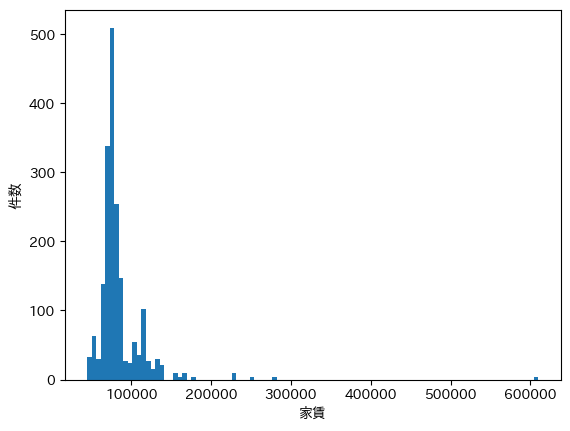

In [358]:
plt.hist(data["家賃"], bins=100)
plt.xlabel("家賃")
plt.ylabel("件数")
plt.show()

In [359]:
data["家賃_log"] = np.log(data["家賃"])

In [360]:
data["家賃_log"]

0       11.277203
1       11.279732
2       11.390758
3       11.396392
4       11.316911
5       11.277203
6       11.279732
7       11.390758
8       11.396392
9       11.316911
10      11.277203
11      11.279732
12      11.390758
13      11.396392
14      11.316911
15      11.026792
16      11.026792
17      11.026792
18      10.985293
19      10.985293
20      10.985293
21      11.289782
22      11.302204
23      11.338572
24      11.338572
25      11.350407
26      11.289782
27      11.302204
28      11.338572
29      11.338572
30      11.350407
31      11.289782
32      11.302204
33      11.338572
34      11.338572
35      11.350407
36      11.225243
37      11.225243
38      11.264464
39      11.264464
40      11.225243
41      11.225243
42      11.264464
43      11.264464
44      11.225243
45      11.225243
46      11.264464
47      11.264464
48      11.225243
49      11.225243
50      11.264464
51      11.264464
52      11.289782
53      11.225243
54      11.225243
55      11

In [361]:
data.corr()

,築年数,家賃,管理費,敷金,礼金,面積(m2),家賃_log
築年数,1.000000,-0.055192,-0.383474,-0.011263,-0.101636,0.174666,-0.127667
家賃,-0.055192,1.000000,0.040157,0.701144,0.691216,0.820482,0.905504
管理費,-0.383474,0.040157,1.000000,-0.149899,-0.030076,-0.156893,-0.001897
敷金,-0.011263,0.701144,-0.149899,1.000000,0.644546,0.672941,0.683105
礼金,-0.101636,0.691216,-0.030076,0.644546,1.000000,0.643055,0.664977
面積(m2),0.174666,0.820482,-0.156893,0.672941,0.643055,1.000000,0.862331
家賃_log,-0.127667,0.905504,-0.001897,0.683105,0.664977,0.862331,1.000000


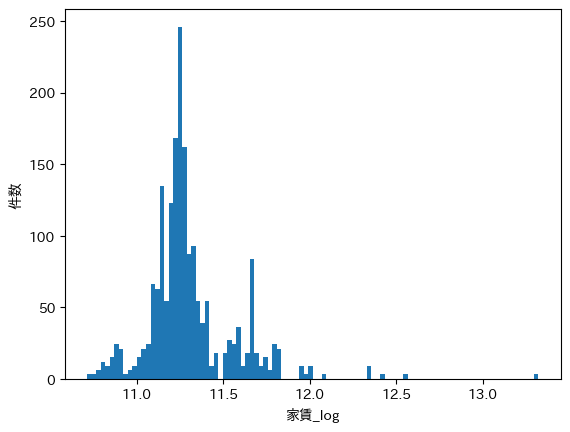

In [362]:
plt.hist(data["家賃_log"], bins=100)
plt.xlabel("家賃_log")
plt.ylabel("件数")
plt.show()

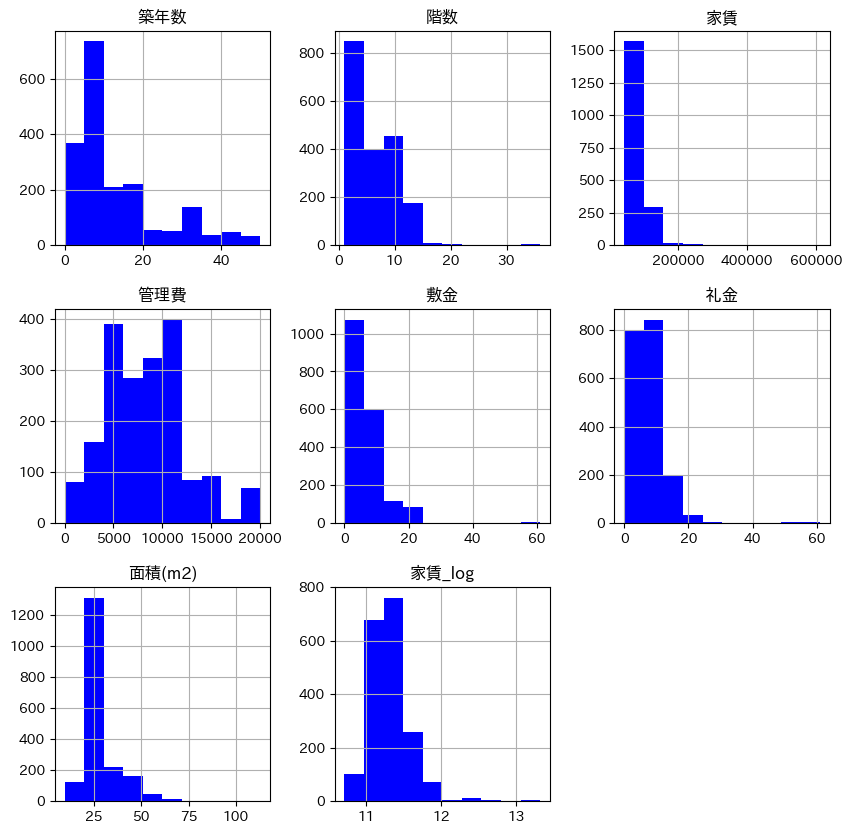

In [395]:
data.hist(figsize=(10, 10), color="b")
plt.show()

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   名称      1893 non-null   object 
 1   カテゴリー   1893 non-null   object 
 2   アドレス    1893 non-null   object 
 3   アクセス    1868 non-null   object 
 4   築年数     1893 non-null   int64  
 5   構造      1893 non-null   object 
 6   階数      1893 non-null   int64  
 7   家賃      1893 non-null   int64  
 8   管理費     1893 non-null   int64  
 9   敷金      1893 non-null   float64
 10  礼金      1893 non-null   float64
 11  間取り     1893 non-null   object 
 12  面積(m2)  1893 non-null   float64
 13  家賃_log  1893 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 207.2+ KB


In [365]:
data.head()

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積(m2),家賃_log
0,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,7階,79000,6500,0.00,0.00,1K,21.6,11.277203
1,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,5階,79200,6800,7.92,7.92,1K,21.6,11.279732
2,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,10階,88500,0,8.85,8.85,1K,21.6,11.390758
3,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,11階,89000,0,8.90,8.90,1K,21.6,11.396392
4,スカイコート川崎西口第2,賃貸マンション,神奈川県川崎市幸区大宮町,ＪＲ京浜東北線/川崎駅 歩5分,13,13階建,12階,82200,6800,8.22,8.22,1K,21.6,11.316911


## アクセスの欠損値

In [366]:
data["アクセス"].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [303]:
print(data)

Empty DataFrame
Columns: [名称, カテゴリー, アドレス, アクセス, 築年数, 構造, 階数, 家賃, 管理費, 敷金, 礼金, 間取り, 面積(m2), 家賃_log]
Index: []


In [367]:
data.isnull().sum()

名称         0
カテゴリー      0
アドレス       0
アクセス      25
築年数        0
構造         0
階数         0
家賃         0
管理費        0
敷金         0
礼金         0
間取り        0
面積(m2)     0
家賃_log     0
dtype: int64

In [368]:
data["アクセス"].head( 780)

0                     ＪＲ京浜東北線/川崎駅 歩5分
1                     ＪＲ京浜東北線/川崎駅 歩5分
2                     ＪＲ京浜東北線/川崎駅 歩5分
3                     ＪＲ京浜東北線/川崎駅 歩5分
4                     ＪＲ京浜東北線/川崎駅 歩5分
5                      ＪＲ南武線/尻手駅 歩11分
6                      ＪＲ南武線/尻手駅 歩11分
7                      ＪＲ南武線/尻手駅 歩11分
8                      ＪＲ南武線/尻手駅 歩11分
9                      ＪＲ南武線/尻手駅 歩11分
10                     京急本線/京急川崎駅 歩7分
11                     京急本線/京急川崎駅 歩7分
12                     京急本線/京急川崎駅 歩7分
13                     京急本線/京急川崎駅 歩7分
14                     京急本線/京急川崎駅 歩7分
15                    ＪＲ京浜東北線/川崎駅 歩7分
16                    京急本線/京急川崎駅 歩10分
17                     ＪＲ南武線/尻手駅 歩13分
18                    ＪＲ京浜東北線/川崎駅 歩7分
19                     京急本線/京急川崎駅 歩8分
20                    京急本線/六郷土手駅 歩25分
21                    ＪＲ京浜東北線/川崎駅 歩4分
22                    ＪＲ京浜東北線/川崎駅 歩4分
23                    ＪＲ京浜東北線/川崎駅 歩4分
24                    ＪＲ京浜東北線/川崎駅 歩4分
25                    ＪＲ京浜東北線/川崎駅 歩4分
26          

In [370]:
data.loc[762:770, :]

,名称,カテゴリー,アドレス,アクセス,築年数,構造,階数,家賃,管理費,敷金,礼金,間取り,面積(m2),家賃_log
762,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,3階,69500,10000,0.00,0.00,1K,20.70,11.149082
763,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,3階,69500,10000,0.00,0.00,1K,20.70,11.149082
764,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,12階,72000,10000,7.20,7.20,1K,21.24,11.184421
765,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,12階,72000,10000,7.20,7.20,1K,21.24,11.184421
766,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,12階,75000,10000,7.50,7.50,1K,21.24,11.225243
767,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,3階,77000,10000,0.00,0.00,1K,20.70,11.251561
768,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,12階,76500,15000,7.65,7.65,1K,21.24,11.245046
769,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,14階,83000,10000,8.30,8.30,1K,22.32,11.326596
770,ＪＲ東海道本線 川崎駅 15階建 築7年,賃貸マンション,神奈川県川崎市川崎区堀之内町,NaN,7,15階建,12階,81500,15000,0.00,0.00,1K,21.20,11.308358


In [416]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=0)
print(train.shape)
print(test.shape)

(1325, 13)
(568, 13)


In [398]:
train = train.dropna()

In [399]:
test = test.dropna()

In [430]:
print(train.shape)
print(test.shape)

(1325, 13)
(568, 13)


In [401]:
train.isnull().sum()

名称        0
カテゴリー     0
アドレス      0
アクセス      0
築年数       0
構造        0
階数        0
家賃        0
管理費       0
敷金        0
礼金        0
間取り       0
面積(m2)    0
家賃_log    0
dtype: int64

In [402]:
test.isnull().sum()

名称        0
カテゴリー     0
アドレス      0
アクセス      0
築年数       0
構造        0
階数        0
家賃        0
管理費       0
敷金        0
礼金        0
間取り       0
面積(m2)    0
家賃_log    0
dtype: int64

In [403]:
train.columns

Index(['名称', 'カテゴリー', 'アドレス', 'アクセス', '築年数', '構造', '階数', '家賃', '管理費', '敷金',
       '礼金', '間取り', '面積(m2)', '家賃_log'],
      dtype='object')

In [404]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 935 to 684
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   名称      1308 non-null   object 
 1   カテゴリー   1308 non-null   object 
 2   アドレス    1308 non-null   object 
 3   アクセス    1308 non-null   object 
 4   築年数     1308 non-null   int64  
 5   構造      1308 non-null   object 
 6   階数      1308 non-null   int64  
 7   家賃      1308 non-null   int64  
 8   管理費     1308 non-null   int64  
 9   敷金      1308 non-null   float64
 10  礼金      1308 non-null   float64
 11  間取り     1308 non-null   object 
 12  面積(m2)  1308 non-null   float64
 13  家賃_log  1308 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 153.3+ KB


In [405]:
for col in ['名称', 'カテゴリー', 'アドレス', 'アクセス', '構造', '間取り']:
    data[col] = data[col].astype("category")

In [413]:
data = data.drop("家賃", axis=1)

In [431]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error as mse

df_train, df_val = train_test_split(train, test_size=0.2)

col = "家賃_log"
train_y = df_train[col]
train_X = df_train.drop(col, axis=1)

val_y = df_val[col]
val_X = df_val.drop(col, axis=1)

trains = lgb.Dataset(train_X, train_y)
valids = lgb.Dataset(val_X, val_y)

params = {
    "objective":"regression",
    "metrics":"mse"
}
model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1500, early_stopping_rounds=100)

/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/kumazawateruhito/opt/anaconda3/envs/base_root/lib/python3.7/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 1060, number of used features: 12
[LightGBM] [Info] Start training from score 11.304862
[1]	valid_0's l1: 0.151612
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 0.137554
[3]	valid_0's l1: 0.125245
[4]	valid_0's l1: 0.113603
[5]	valid_0's l1: 0.103522
[6]	valid_0's l1: 0.0943163
[7]	valid_0's l1: 0.0862917
[8]	valid_0's l1: 0.0789874
[9]	valid_0's l1: 0.0726004
[10]	valid_0's l1: 0.0667163
[11]	valid_0's l1: 0.0614759
[12]	valid_0's l1: 0.0568535
[13]	valid_0's l1: 0.0527424
[14]	valid_0's l1: 0.0491024
[15]	valid_0's l1: 0.0457599
[16]	valid_0's l1: 0.0427341
[17]	valid_0's l1: 0.0404235
[18]	valid_0's l1: 0.0380121
[19]	valid_0's l1: 0.0362331
[20]	valid_0's l1: 0.0346466
[21]	valid_0's l1: 0.033225


In [432]:
test_X = test.copy()

In [433]:
test_y = test_X[col]

In [434]:
test_X = test_X.drop(col, axis=1)

In [435]:
vals = model.predict(test_X)

In [436]:
mse(vals, test_y)

0.00040203035761013877

In [428]:
model.feature_importance()

array([ 319,  387,  796, 1293, 3471,  922, 8561, 5976, 3872, 6876,  708,
       9689], dtype=int32)

In [429]:
pd.DataFrame(model.feature_importance(), index=val_X.columns, columns=["importance"]).sort_values("importance", ascending=False)

,importance
面積(m2),9689
階数,8561
礼金,6876
管理費,5976
敷金,3872
築年数,3471
アクセス,1293
構造,922
アドレス,796
間取り,708
